In [1]:
import time

import pandas as pd
import numpy as np
import random
from tqdm import tqdm

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# 自作関数
from dataload.data_load import data_load
from func.my_func import *

In [34]:
INPUT_DIR = '../data/'

df = pd.read_csv(INPUT_DIR + 'answer_target_1759.csv')
X = df.drop([
    'TargetDate',
    'y',
    'mean'
    ], axis=1)
y = df['y'].fillna(0)
X

,StepSum,LowActivityHours,MaxValue,MinValue,RestValue,DiffRestValue,WakedUpValue,DiffWakedUpValue,SleepQuality,SleepHours,LightSleepHours,DeepSleepHours,SleepWakeCount
0,5567.000000,2.800000,123.000000,63.000000,67.00000,-4.000000,64.5,4.907692,4.000000,6.500000,3.000000,3.500000,0.000000
1,1710.000000,1.000000,107.000000,50.000000,70.00000,3.000000,66.0,0.000000,3.448276,6.527586,3.296552,3.151724,0.344828
2,5878.000000,7.200000,115.000000,45.000000,64.00000,-4.500000,64.5,4.907692,2.000000,7.000000,3.500000,3.400000,2.000000
3,3896.000000,4.600000,176.000000,50.000000,59.00000,-8.000000,64.5,4.907692,3.000000,6.500000,3.400000,3.000000,1.000000
4,5016.000000,0.000000,137.000000,56.000000,59.00000,-6.000000,64.5,4.907692,3.000000,5.500000,2.500000,3.000000,0.000000
5,16934.000000,7.500000,149.000000,51.000000,63.00000,-0.800000,56.0,-5.000000,4.000000,6.100000,2.700000,3.400000,0.000000
6,6678.000000,6.700000,156.000000,51.000000,59.00000,-4.700000,57.0,-2.700000,4.000000,6.400000,2.800000,3.500000,1.000000
7,5128.000000,1.000000,134.000000,54.000000,70.00000,7.000000,62.0,1.700000,4.000000,6.000000,2.700000,3.300000,0.000000
8,4960.000000,1.300000,174.000000,50.000000,60.00000,-3.800000,63.0,2.200000,3.000000,5.900000,3.300000,2.500000,0.000000
9,5295.000000,6.500000,167.000000,57.000000,59.00000,-4.400000,62.0,1.000000,3.000000,5.800000,2.900000,2.800000,1.000000


In [35]:
y.mean()

0.46938775510204084

In [36]:
y[y == 1]

11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
23    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
36    1.0
37    1.0
39    1.0
40    1.0
41    1.0
43    1.0
45    1.0
46    1.0
47    1.0
Name: y, dtype: float64

In [37]:
n_experiment = 10
ex_name = '0613'
data = 'id1759'

AUC            0.494048
accuracy           0.55
recall              0.5
Specificity    0.571429
precision      0.333333
gmeans         0.534522
RS                0.875
Name: 0, dtype: object

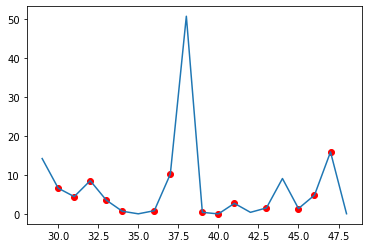

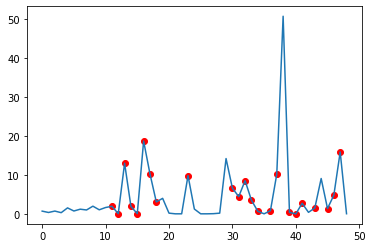

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
# 使用する7つの変数をランダムに取得する
# バギングをする際はそれぞれのサブサンプルで7つの変数を選択する．
result_df = pd.DataFrame(
                            columns=['AUC', 'accuracy', 'recall', 'Specificity', 'precision', 'gmeans', 'RS'],
                            index=range(n_experiment))
random_s = random.sample(list(X.columns), len(X.columns) if len(X.columns) < 7 else 7)
X = X[random_s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

result_scaler, result_inv_C, select_columns = fit_MTS(X_train, y_train)

y_train_pred = predict_MD(X_train, result_scaler, result_inv_C, select_columns)

threshold = determine_threshold(y_train, y_train_pred)

y_proba = predict_MD(X_test, result_scaler, result_inv_C, select_columns)
y_pred = y_proba > threshold

result_df = make_result_df(result_df, y_test, y_pred, y_proba, 0)
display(result_df.iloc[0])
sns.lineplot(x=X_test.index, y=y_proba)
plt.scatter(x=y_test[y_test == 1].index, y=y_proba[y_test == 1], c='r')
plt.show()
sns.lineplot(x=X.index, y=predict_MD(X, result_scaler, result_inv_C, select_columns))
plt.scatter(x=y[y == 1].index, y=predict_MD(X, result_scaler, result_inv_C, select_columns)[y == 1], c='r')
plt.show()

c:\Users\baseb\Documents\github\修論\SMOTEMTSBag\MTSBag\code\func\my_func.py:574: RuntimeWarning: divide by zero encountered in double_scalars
  result_df['RS'][m] = (TP / (TP + FN)) / (TN / (TN + FP))


AUC            0.404762
accuracy            0.2
recall         0.666667
Specificity         0.0
precision      0.222222
gmeans              0.0
RS                  inf
Name: 0, dtype: object

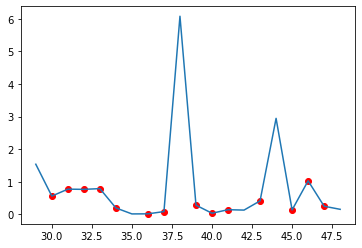

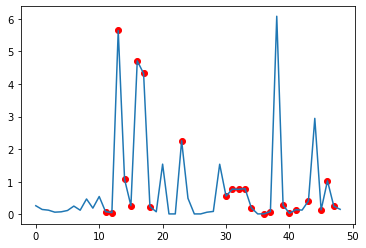

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
# 使用する7つの変数をランダムに取得する
# バギングをする際はそれぞれのサブサンプルで7つの変数を選択する．
result_df = pd.DataFrame(
                            columns=['AUC', 'accuracy', 'recall', 'Specificity', 'precision', 'gmeans', 'RS'],
                            index=range(n_experiment))
random_s = random.sample(list(X.columns), len(X.columns) if len(X.columns) < 7 else 7)
X = X[random_s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight = fit_WMTGS(X_train, y_train)
y_train_pred = cal_gram_WMD_by_reduced_model(X_train, reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight)

threshold = determine_threshold(y_train, y_train_pred)

y_proba, y_pred = predict_WMTGS(X_test, reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight, threshold)


result_df = make_result_df(result_df, y_test, y_pred, y_proba, 0)
display(result_df.iloc[0])
sns.lineplot(x=X_test.index, y=y_proba)
plt.scatter(x=y_test[y_test == 1].index, y=y_proba[y_test == 1], c='r')
plt.show()
all_pred, _ = predict_WMTGS(X, reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight, threshold)

sns.lineplot(x=X.index, y=all_pred)
plt.scatter(x=y[y == 1].index, y=all_pred[y == 1], c='r')
plt.show()

C:\Users\baseb\anaconda3\envs\convenient\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\baseb\Documents\github\修論\SMOTEMTSBag\MTSBag\code\func\my_func.py:574: RuntimeWarning: divide by zero encountered in double_scalars
  result_df['RS'][m] = (TP / (TP + FN)) / (TN / (TN + FP))


AUC            0.559524
accuracy           0.25
recall         0.833333
Specificity         0.0
precision      0.263158
gmeans              0.0
RS                  inf
Name: 0, dtype: object

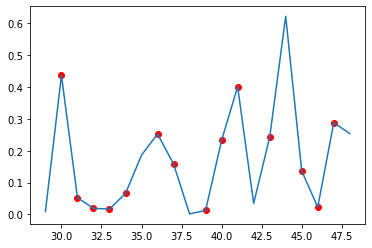

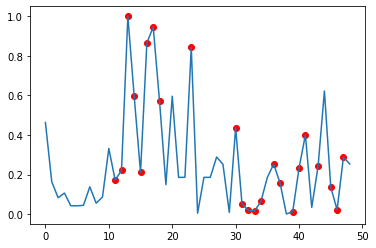

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習
result_df = pd.DataFrame(
                            columns=['AUC', 'accuracy', 'recall', 'Specificity', 'precision', 'gmeans', 'RS'],
                            index=range(n_experiment))
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]
result_df = make_result_df(result_df, y_test, y_pred, y_proba, 0)
display(result_df.iloc[0])
sns.lineplot(x=X_test.index, y=y_proba)
plt.scatter(x=y_test[y_test == 1].index, y=y_proba[y_test == 1], c='r')
plt.show()

all_pred = lr.predict_proba(X)[:, 1]

sns.lineplot(x=X.index, y=all_pred)
plt.scatter(x=y[y == 1].index, y=all_pred[y == 1], c='r')
plt.show()

In [54]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

AUC             0.89881
accuracy           0.55
recall              1.0
Specificity    0.357143
precision           0.4
gmeans         0.597614
RS                  2.8
Name: 0, dtype: object

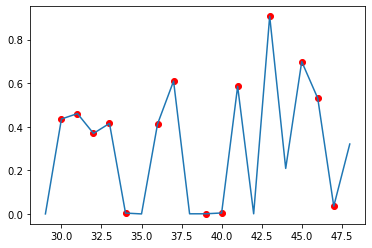

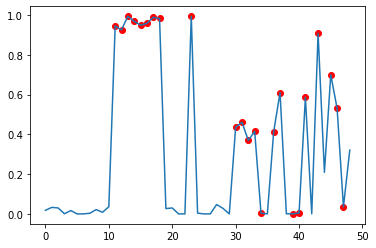

In [59]:
import lightgbm
lr = lightgbm.LGBMClassifier(min_child_samples=5) # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習
result_df = pd.DataFrame(
                            columns=['AUC', 'accuracy', 'recall', 'Specificity', 'precision', 'gmeans', 'RS'],
                            index=range(n_experiment))
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]
result_df = make_result_df(result_df, y_test, y_pred, y_proba, 0)
display(result_df.iloc[0])
sns.lineplot(x=X_test.index, y=y_proba)
plt.scatter(x=y_test[y_test == 1].index, y=y_proba[y_test == 1], c='r')
plt.show()

all_pred = lr.predict_proba(X)[:, 1]

sns.lineplot(x=X.index, y=all_pred)
plt.scatter(x=y[y == 1].index, y=all_pred[y == 1], c='r')
plt.show()